In [37]:
# Author: Maximiliano Lopez Salgado
# Date created: 2023-05-04
# Last modified: 2023-05-04
# Description: This script is used to predict the price of a wine based on its quality 

# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [38]:
# Import data
price_df = pd.read_csv('wine_sales_data.csv')

# Explore data
display(price_df.head())
display(price_df.info())
display(price_df.describe())

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150930 entries, 0 to 150929
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Unnamed: 0   150930 non-null  int64  
 1   country      150925 non-null  object 
 2   description  150930 non-null  object 
 3   designation  105195 non-null  object 
 4   points       150930 non-null  int64  
 5   price        137235 non-null  float64
 6   province     150925 non-null  object 
 7   region_1     125870 non-null  object 
 8   region_2     60953 non-null   object 
 9   variety      150930 non-null  object 
 10  winery       150930 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 12.7+ MB


None

,Unnamed: 0,points,price
count,150930.000000,150930.000000,137235.000000
mean,75464.500000,87.888418,33.131482
std,43569.882402,3.222392,36.322536
min,0.000000,80.000000,4.000000
25%,37732.250000,86.000000,16.000000
50%,75464.500000,88.000000,24.000000
75%,113196.750000,90.000000,40.000000
max,150929.000000,100.000000,2300.000000


In [39]:
# Check for missing values
display(price_df.isnull().sum())


Unnamed: 0         0
country            5
description        0
designation    45735
points             0
price          13695
province           5
region_1       25060
region_2       89977
variety            0
winery             0
dtype: int64

In [40]:
# Check for duplicates
display(price_df.duplicated().sum())


0

In [41]:
# Create a new dataframe with only the 'Portugal' country and 'Vinho Verde' region

price_PT_VV_df = price_df[(price_df['country'] == 'Portugal') & (price_df['province'] == 'Vinho Verde')]
display(price_PT_VV_df.head())
display(price_PT_VV_df.info())
display(price_PT_VV_df.describe())



,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo


<class 'pandas.core.frame.DataFrame'>
Int64Index: 396 entries, 277 to 143575
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   396 non-null    int64  
 1   country      396 non-null    object 
 2   description  396 non-null    object 
 3   designation  301 non-null    object 
 4   points       396 non-null    int64  
 5   price        310 non-null    float64
 6   province     396 non-null    object 
 7   region_1     0 non-null      object 
 8   region_2     0 non-null      object 
 9   variety      396 non-null    object 
 10  winery       396 non-null    object 
dtypes: float64(1), int64(2), object(8)
memory usage: 37.1+ KB


None

,Unnamed: 0,points,price
count,396.000000,396.000000,310.000000
mean,70480.558081,86.409091,11.400000
std,42469.897042,2.491366,4.821205
min,277.000000,80.000000,5.000000
25%,33405.000000,85.000000,8.000000
50%,72737.500000,86.000000,10.000000
75%,105342.250000,88.000000,13.000000
max,143575.000000,92.000000,45.000000


In [42]:
# drop index column
price_PT_VV_df.drop('Unnamed: 0', axis=1, inplace=True)

# drop duplicates
price_PT_VV_df.drop_duplicates(inplace=True)

price_PT_VV_df 

/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_75650/688313124.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_PT_VV_df.drop('Unnamed: 0', axis=1, inplace=True)
/var/folders/zh/sct9634x6kvcb6_5gkff84nh0000gn/T/ipykernel_75650/688313124.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_PT_VV_df.drop_duplicates(inplace=True)


,country,description,designation,points,price,province,region_1,region_2,variety,winery
277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,NaN,NaN,Alvarinho,Provam
993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,NaN,NaN,Portuguese White,Caves Campelo
1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,NaN,NaN,Loureiro,Casal Paço Padreiro
1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,NaN,NaN,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...,...,...
141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,NaN,NaN,Portuguese White,Adega Cooperativa Ponte de Lima
141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,NaN,NaN,Portuguese White,Casa de Vila Verde
141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,NaN,NaN,Portuguese White,Borges
143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,NaN,NaN,White Blend,Casa de Vila Verde


In [43]:
# drop region_1 and region_2 columns
price_PT_VV_df = price_PT_VV_df.drop(['region_1', 'region_2'], axis=1, inplace=None)

In [44]:
price_PT_VV_df

,country,description,designation,points,price,province,variety,winery
277,Portugal,"Pure Alvarinho from the Monção region, it's ri...",Portal do Fidalgo,92,35.0,Vinho Verde,Alvarinho,Provam
993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,Portuguese White,Caves Campelo
994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,Portuguese White,Caves Campelo
1378,Portugal,Some wood aging has rounded out this fruity wi...,Daphne,91,NaN,Vinho Verde,Loureiro,Casal Paço Padreiro
1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,Rosé,Caves Campelo
...,...,...,...,...,...,...,...,...
141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,Portuguese White,Adega Cooperativa Ponte de Lima
141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,Portuguese White,Casa de Vila Verde
141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,Portuguese White,Borges
143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,White Blend,Casa de Vila Verde


In [45]:
# Check for missing values, duplicates and data types
display(price_PT_VV_df.isnull().sum())
display(price_PT_VV_df.duplicated().sum())
display(price_PT_VV_df.info())


country         0
description     0
designation    60
points          0
price          52
province        0
variety         0
winery          0
dtype: int64

0

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254 entries, 277 to 143575
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   country      254 non-null    object 
 1   description  254 non-null    object 
 2   designation  194 non-null    object 
 3   points       254 non-null    int64  
 4   price        202 non-null    float64
 5   province     254 non-null    object 
 6   variety      254 non-null    object 
 7   winery       254 non-null    object 
dtypes: float64(1), int64(1), object(6)
memory usage: 17.9+ KB


None

In [46]:
# Calculate IQR
Q1 = price_PT_VV_df['price'].quantile(0.25)
Q3 = price_PT_VV_df['price'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

# Remove outliers
price_PT_VV_df = price_PT_VV_df[(price_PT_VV_df['price'] >= Q1 - 1.5*IQR) & (price_PT_VV_df['price'] <= Q3 + 1.5*IQR)]
price_PT_VV_df


4.75


,country,description,designation,points,price,province,variety,winery
993,Portugal,"With its typical prickle on the tongue, this i...",Campelo,85,10.0,Vinho Verde,Portuguese White,Caves Campelo
994,Portugal,"Lightly spritzy, this tastes of crisp apple an...",Miranda,85,9.0,Vinho Verde,Portuguese White,Caves Campelo
1558,Portugal,This medium-sweet rosé is a familiar style of ...,Campelo,84,10.0,Vinho Verde,Rosé,Caves Campelo
1559,Portugal,"Soft, light and fruity, this wine is ready for...",Casal da Seara,84,10.0,Vinho Verde,Portuguese White,Caves Campelo
1694,Portugal,"Crisp, dry and fresh, this is a lively and fru...",Torre de Vila Nova,88,12.0,Vinho Verde,Portuguese White,Casa de Vila Nova
...,...,...,...,...,...,...,...,...
141129,Portugal,"A simple, rather earthy, dry style of vinho ve...",NaN,83,9.0,Vinho Verde,Portuguese White,Adega Cooperativa Ponte de Lima
141143,Portugal,The estate wine from Vila Verde which is in Lo...,NaN,82,8.0,Vinho Verde,Portuguese White,Casa de Vila Verde
141148,Portugal,"The standard style of inexpensive Vinho Verde,...",Gatão,82,6.0,Vinho Verde,Portuguese White,Borges
143472,Portugal,"Very nice Vinho Verde, with fresh, green apple...",NaN,86,9.0,Vinho Verde,White Blend,Casa de Vila Verde


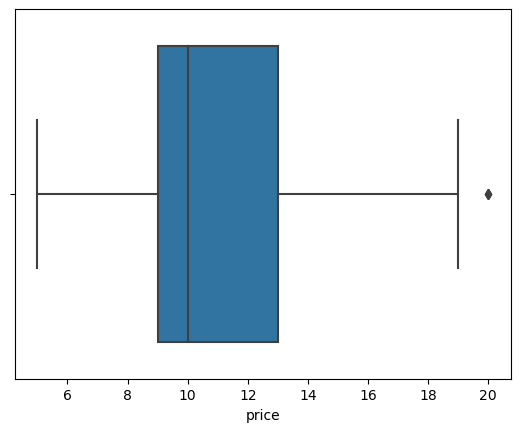

In [47]:
# boxplot
sns.boxplot(x=price_PT_VV_df['price'])

plt.show()

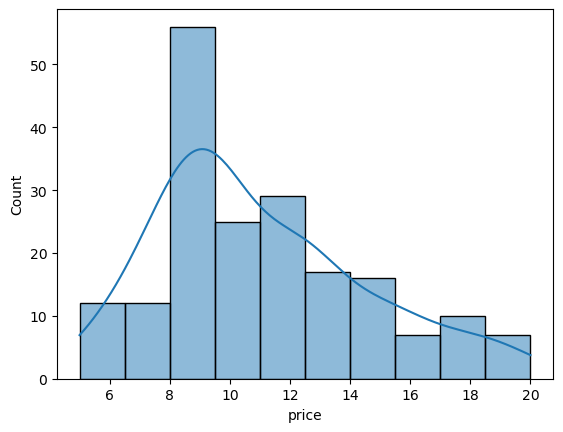

In [48]:
# histogram
sns.histplot(x=price_PT_VV_df['price'], kde=True, bins=10)

# order the price values in ascending order
price_PT_VV_df = price_PT_VV_df.sort_values(by='price', ascending=True)

plt.show()

In [51]:
# create a column called "price_label" and define a range and associate that range with a label name (low, medium, high)
price_PT_VV_df['price_label'] = price_PT_VV_df['price'].apply(lambda value: 'low'
if value <= 11 else 'medium'
if value <= 16 else 'high')
price_PT_VV_df

,country,description,designation,points,price,province,variety,winery,price_label
64214,Portugal,"Bright, crisp raspberry flavors on a bone-dry ...",NaN,84,5.0,Vinho Verde,Rosé,Campelo,low
64728,Portugal,"They say red Vinho Verde is an acquired taste,...",Tinto,83,5.0,Vinho Verde,Portuguese Red,Campelo,low
64862,Portugal,"Dry Vinho Verde, showing all the citrus crispn...",Branco,83,5.0,Vinho Verde,Portuguese White,Campelo,low
69542,Portugal,"A sweet, soft, clean wine, anonymous almost. Y...",NaN,82,5.0,Vinho Verde,Portuguese White,Lagosta,low
20554,Portugal,Crisp apple-green wine with just the right amo...,Via Latina,85,6.0,Vinho Verde,Portuguese White,Vercoope,low
...,...,...,...,...,...,...,...,...,...
94617,Portugal,"This is very aromatic, with lively acidity, a ...",Toucas,89,19.0,Vinho Verde,Portuguese White,Wines & Winemakers,high
73319,Portugal,"A superior Vinho Verde, elegant and full-bodie...",Toucas,91,19.0,Vinho Verde,Alvarinho,Wines & Winemakers,high
136703,Portugal,Here six months in wood have enhanced the frui...,Muros de Melgaço,89,20.0,Vinho Verde,Alvarinho,Anselmo Mendes,high
46986,Portugal,Almonds and ripe yellow fruits combine in this...,Eminência,87,20.0,Vinho Verde,Loureiro,Ideal Drinks,high


In [52]:
price_PT_VV_df['price_label'].value_counts()


low       115
medium     59
high       17
Name: price_label, dtype: int64

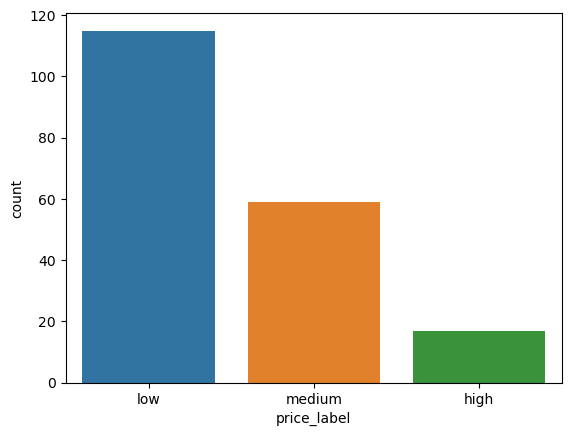

In [53]:
# create a barplot to visualize the price_label column
sns.countplot(x=price_PT_VV_df['price_label'])

plt.show()

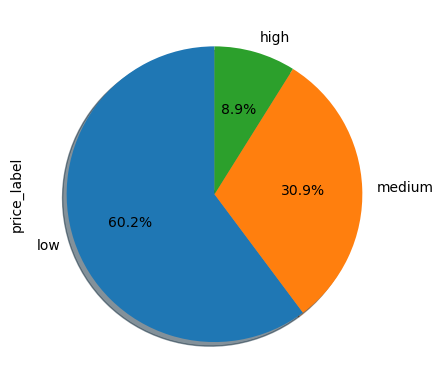

In [54]:
# create a piechart to visualize the price_label column
price_PT_VV_df['price_label'].value_counts().plot(kind='pie', autopct='%1.1f%%', shadow=True, startangle=90)

plt.show()